text_width 6.75
column_width 3.25
RDP
25.744648039340973 1.81
0.9106121047648725 2.77
0.9939339137077331 0.5
PET-DDS
24.83417183160782 398.0
0.909705623067086 398.0
1.0059131932258605 158.0
PET-DDS+RDPz
25.703770697116852 158.0
0.9221662734198013 63.1
0.9955057430267334 158.0
DIP+RDP
25.255219042301178 9800.0
0.917274887093841 10800.0
0.9664704489707947 9500.0


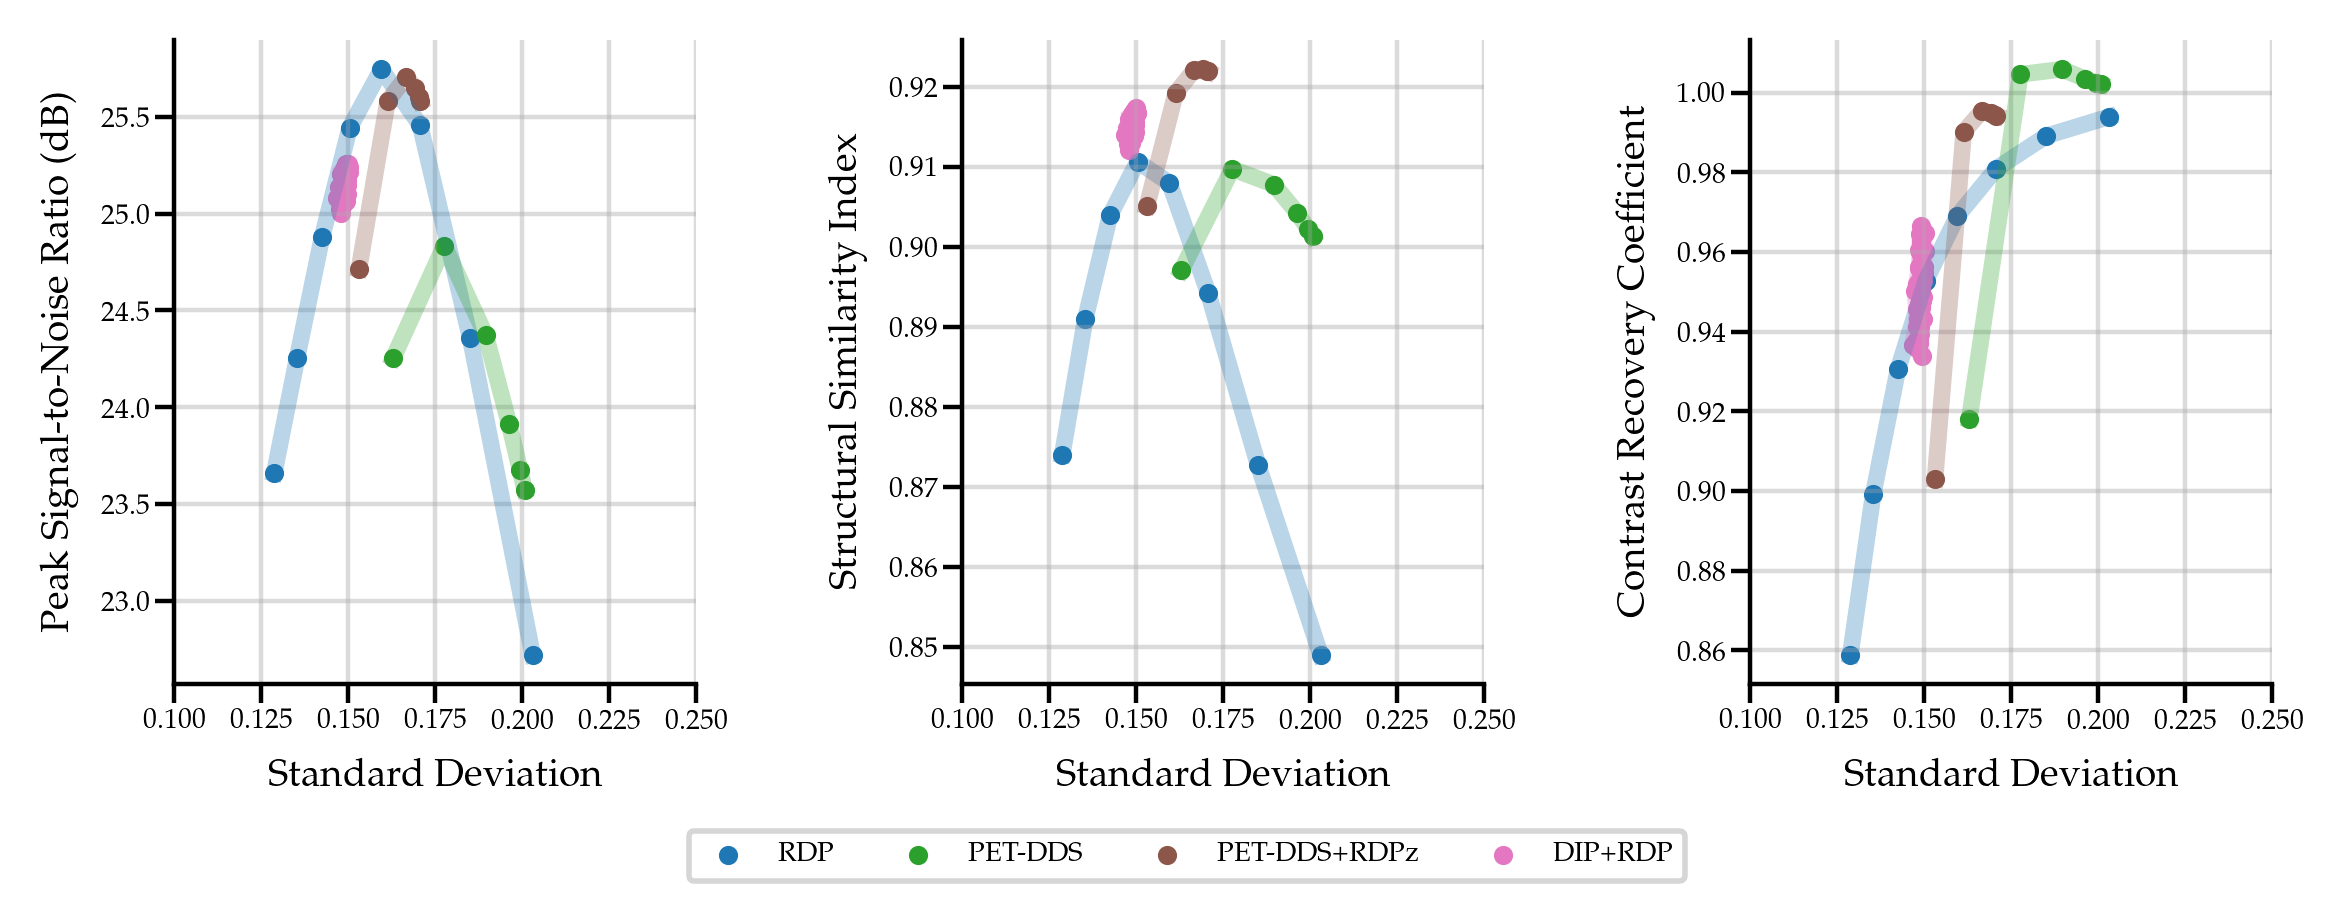

In [1]:
import matplotlib, os
import numpy as np
import matplotlib.pyplot as plt
from result_util_3D import get_sweep_mean_results
import matplotlib.patches as mpatches

text_width = (72.27 ** -1) * 487.8225 # in  --> Confirmed with template explanation
print('text_width', text_width)
column_width = (72.27 ** -1) * 234.8775
print('column_width', column_width)

fs_m1 = 5  # for figure ticks
fs = 7  # for regular figure text
fs_p1 = 8  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(text_width, text_width/3), dpi = 400)

f_to_name = {
    "rdp": r"RDP",
    #"rdpz": r"RDPz",
    "dds_0.0": r"PET-DDS",
    "dds_5.0": r"PET-DDS RDPz $\beta = 5.0$",
    "dds_10.5": r"PET-DDS RDPz $\beta = 10.5$",
    "dds_21.9": r"PET-DDS+RDPz",
    "dds_45.7": r"PET-DDS RDPz $\beta = 45.7$",
    "dds_95.6": r"PET-DDS RDPz $\beta = 95.6$",
    "dds_200.0": r"PET-DDS RDPz $\beta = 200.0$",
    "DIP_0.1": r"DIP+RDP",
    "DIP_0.0": r"DIP "
}

f_to_color = { 
    "rdp": '#1f77b4',
    #"rdpz": '#ff7f0e',
    "dds_0.0": '#2ca02c', 
    #"dds_5.0": '#d62728',
    #"dds_10.5": '#9467bd',
    "dds_21.9": '#8c564b',
    #"dds_45.7": '#e377c2',
    #"dds_95.6": '#7f7f7f',
    #"dds_200.0": '#bcbd22',
    "DIP_0.1": '#e377c2',
    #"DIP_0.0": '#7f7f7f',
}
c_idx = 0
dip_start = 100
dip_end = -50
dip_incre = 1
for r in f_to_color.keys():
    res = get_sweep_mean_results(f"3D_dicts/brainweb3D_low_FDG/{r}.pt")
    if "DIP" in r:
        ax1.plot(res["std"][dip_end:], res["psnr"][dip_end:], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax1.scatter(res["std"][dip_end:], res["psnr"][dip_end:], label=f_to_name[r], c=f_to_color[r],s=6)

        ax2.plot(res["std"][dip_end:], res["ssim"][dip_end:], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax2.scatter(res["std"][dip_end:], res["ssim"][dip_end:], label=f_to_name[r], c=f_to_color[r],s=6)

        crc_means = []
        for crc_vals in res["crc"][dip_end:]:
            crc_means.append(sum(crc_vals)/len(crc_vals))
        ax3.plot(res["std"][dip_end:], crc_means, ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax3.scatter(res["std"][dip_end:], crc_means, label=f_to_name[r], c=f_to_color[r],s=6)
        print(f_to_name[r])
        idx = res["psnr"][dip_end:].index(max(res["psnr"][dip_end:]))
        print(max(res["psnr"][dip_end:]), res["datafit_strengths"][dip_end:][idx])
        idx = res["ssim"][dip_end:].index(max(res["ssim"][dip_end:]))
        print(max(res["ssim"][dip_end:]), res["datafit_strengths"][dip_end:][idx])
        idx = crc_means.index(max(crc_means))
        print(max(crc_means), res["datafit_strengths"][dip_end:][idx])
    else:
        ax1.plot(res["std"], res["psnr"], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax1.scatter(res["std"], res["psnr"], label=f_to_name[r], c=f_to_color[r],s=6)

        ax2.plot(res["std"], res["ssim"], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax2.scatter(res["std"], res["ssim"], label=f_to_name[r], c=f_to_color[r],s=6)
        """ if "dds_0.0" in r or "dds_21.9" in r or "rdp" in r:
           print(res["datafit_strengths"])
           for i in range(len(res["datafit_strengths"])):
               ax2.text(res["std"][i], res["ssim"][i], str(res["datafit_strengths"][i])) """


        crc_means = []
        for crc_vals in res["crc"]:
            crc_means.append(sum(crc_vals)/len(crc_vals))
        ax3.plot(res["std"], crc_means, ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax3.scatter(res["std"], crc_means, label=f_to_name[r], c=f_to_color[r],s=6)
        print(f_to_name[r])
        idx = res["psnr"].index(max(res["psnr"]))
        print(max(res["psnr"]), res["datafit_strengths"][idx])
        idx = res["ssim"].index(max(res["ssim"]))
        print(max(res["ssim"]), res["datafit_strengths"][idx])
        idx = crc_means.index(max(crc_means))
        print(max(crc_means), res["datafit_strengths"][idx])

        
ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top']].set_visible(False)
ax1.tick_params(axis='both', which='major', pad = 1)
ax2.tick_params(axis='both', which='major', pad = 1)
ax3.tick_params(axis='both', which='major', pad = 1)
ax1.set_ylabel(r"Peak Signal-to-Noise Ratio (dB)")
ax1.set_xlabel(r"Standard Deviation")
ax2.set_ylabel(r"Structural Similarity Index")
ax2.set_xlabel(r"Standard Deviation")
ax3.set_ylabel(r"Contrast Recovery Coefficient")
ax3.set_xlabel(r"Standard Deviation")

ax1.set_xlim(0.1, 0.25)
ax2.set_xlim(0.1, 0.25)
ax3.set_xlim(0.1, 0.25)

ax1.grid(0.3, alpha=0.45, zorder=0)
ax2.grid(0.3, alpha=0.45, zorder=0)
ax3.grid(0.3, alpha=0.45, zorder=0)

lines_labels =  [ax1.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncols=6, loc="lower center", bbox_to_anchor=(0.5, -0.07))

plt.subplots_adjust(left=0.125,
        bottom=0.164,
        right=0.902,
        top=0.88,
        wspace=0.51,
        hspace=0.212)
plt.savefig("fdg_plot.pdf", dpi=400, bbox_inches = 'tight')

text_width 6.75
column_width 3.25


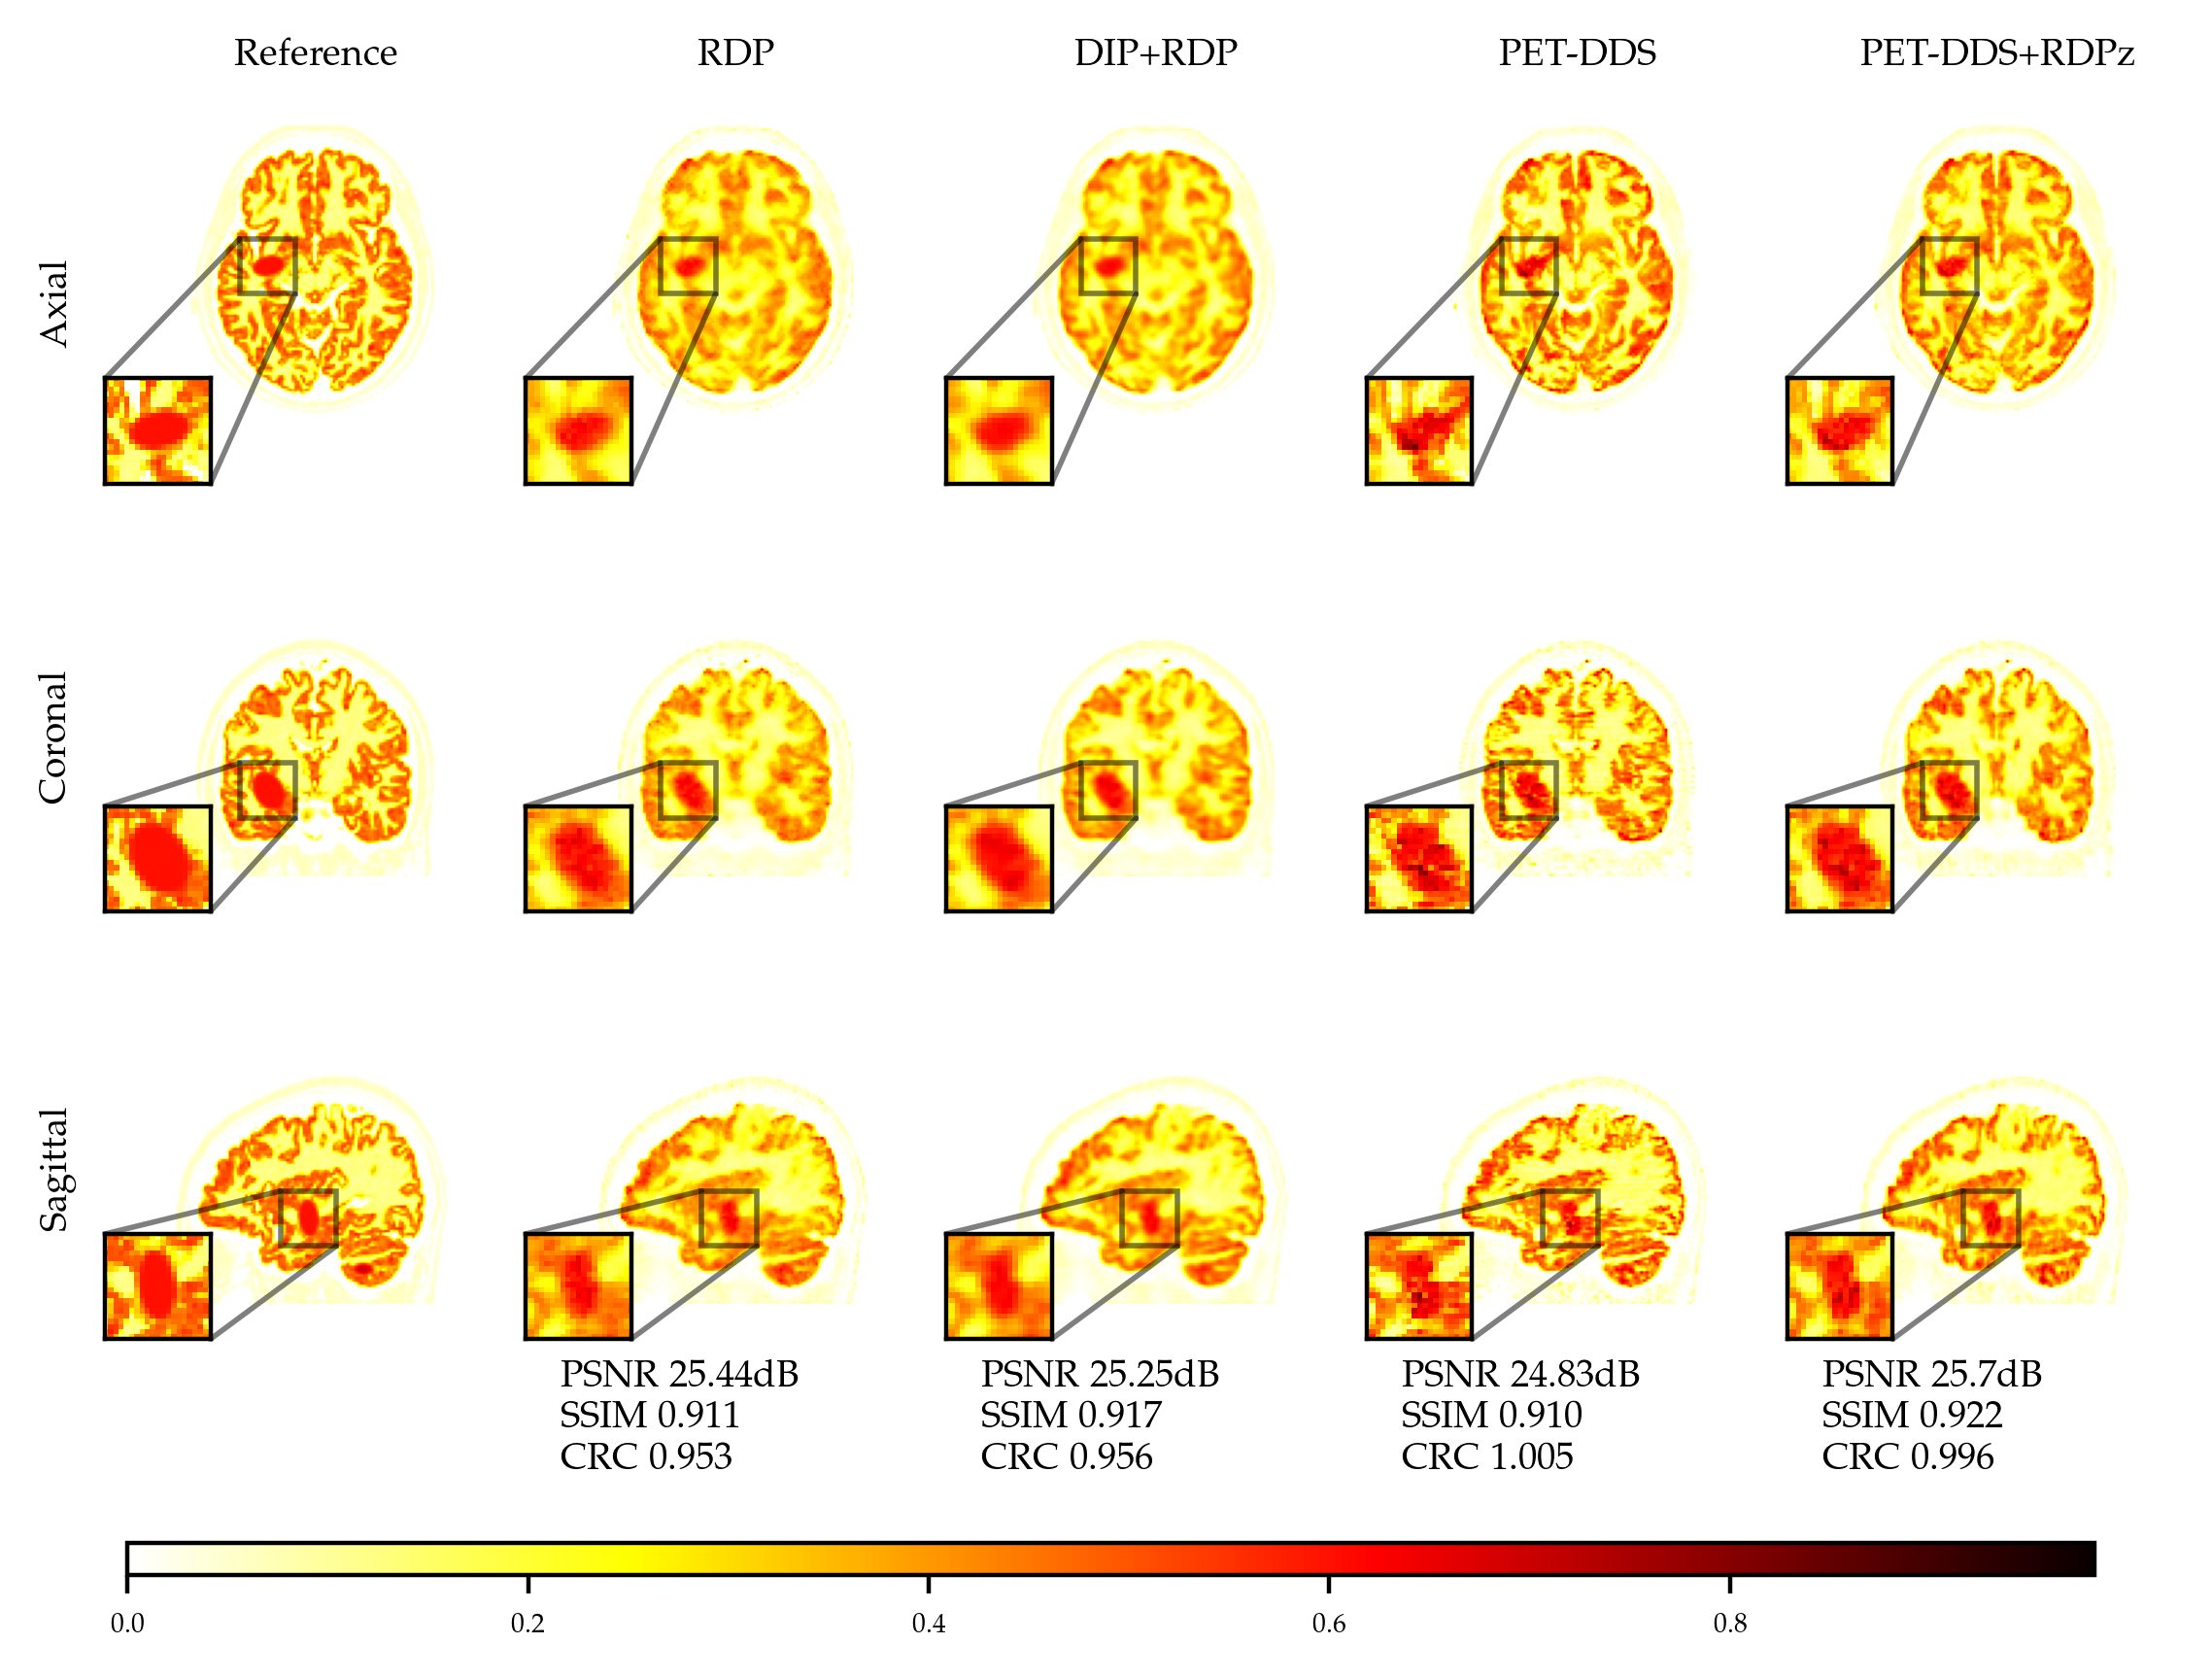

In [2]:
import numpy as np
import sirf.STIR as pet
import matplotlib, torch
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable

text_width = (72.27 ** -1) * 487.8225 # in  --> Confirmed with template explanation
print('text_width', text_width)
column_width = (72.27 ** -1) * 234.8775
print('column_width', column_width)
fs_m1 = 5  # for figure ticks
fs = 7  # for regular figure text
fs_p1 = 8  # figure titles
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)
# Scaled reference as linear model and scaled data
fig, ax = plt.subplots(3,5, figsize=(text_width, text_width*3/5), dpi = 400)
xs = [torch.from_numpy(pet.ImageData(f"/home/user/sirf/src/sirf/brainweb_3D/FDG_PET_lr.hv").as_array()) * 0.0018871473105862091 / 4.0024639524408965,
    torch.load("/home/user/sirf/coordinators/BSREM/brainweb3D_low_0_FDG/rdp_beta_2.77/volume.pt"),
    torch.load("/home/user/sirf/coordinators/DIP/brainweb3D_low_0_FDG/DIP_beta_0.1_iters_10800/volume.pt"),
    torch.load("/home/user/sirf/coordinators/FINAL_3D/brainweb3D_low_0_FDG/dds_3D_iters_5_subsets_28_lambda_398.0_beta_0.0/28/volume.pt"),
    torch.load("/home/user/sirf/coordinators/FINAL_3D/brainweb3D_low_0_FDG/dds_3D_iters_5_subsets_28_lambda_158.0_beta_21.9/24/volume.pt")]

labels = ["Reference", "RDP", "DIP+RDP","PET-DDS", "PET-DDS+RDPz"]
quality = ["N/A", "PSNR 25.7, SSIM 0.922, CRC 0.996"]
vmax = max([x.max() for x in xs])
tumours = [[46,61,31]]
for i in range(len(xs)):
    x = xs[i]
    for j in range(3):
        ax[j,i].set_axis_off()
        if j == 0:
            ax[j,i].imshow(x[tumours[0][2], :, :], extent=(0, 127, 0, 127), cmap="hot_r", vmax=vmax)
            axins = ax[j,i].inset_axes([-.1, -.1, 0.3, 0.3])
            axins.imshow(x[tumours[0][2], :, :], extent=(0, 127, 0, 127), vmin=0, vmax=vmax, cmap="hot_r")
            x0, y0 = tumours[0][0], (127-tumours[0][1])
            axins.set_xlim(x0-10, x0+10)
            axins.set_ylim(y0-10, y0+10)
            axins.set_xticklabels([]); axins.set_yticklabels([]); axins.get_xaxis().set_ticks([]); axins.get_yaxis().set_ticks([])
            ax[j,i].indicate_inset_zoom(axins, edgecolor="black")
            ax[j,i].set_title(labels[i])
        elif j == 1:
            img = torch.flip(x[:, tumours[0][1], :],[0])
            img = torch.zeros(128,128)
            img[38:,0:128]  = torch.flip(x[:, tumours[0][1], :],[0])
            ax[j,i].imshow(img, extent=(0, 127, 0, 127), cmap="hot_r", vmax=vmax)
            axins = ax[j,i].inset_axes([-.1, -.1, 0.3, 0.3])
            axins.imshow(img, extent=(0, 127, 0, 127), vmin=0, vmax=vmax, cmap="hot_r")
            x0, y0 = tumours[0][0], tumours[0][2]
            axins.set_xlim(x0-10, x0+10)
            axins.set_ylim(y0-10, y0+10)
            axins.set_xticklabels([]); axins.set_yticklabels([]); axins.get_xaxis().set_ticks([]); axins.get_yaxis().set_ticks([])
            ax[j,i].indicate_inset_zoom(axins, edgecolor="black")
        elif j == 2:
            img = torch.flip(x[:, :, tumours[0][0]],[0])
            img = torch.zeros(128,128)
            img[38:,0:128]  = torch.flip(x[:, :, tumours[0][0]],[0])
            im = ax[j,i].imshow(img, extent=(0, 127, 0, 127), cmap="hot_r", vmax=vmax)
            axins = ax[j,i].inset_axes([-.1, -.1, 0.3, 0.3])
            axins.imshow(img, extent=(0, 127, 0, 127), vmin=0, vmax=vmax, cmap="hot_r")
            x0, y0 = tumours[0][1], tumours[0][2]
            axins.set_xlim(x0-10, x0+10)
            axins.set_ylim(y0-10, y0+10)
            axins.set_xticklabels([]); axins.set_yticklabels([]); axins.get_xaxis().set_ticks([]); axins.get_yaxis().set_ticks([])
            ax[j,i].indicate_inset_zoom(axins, edgecolor="black")
ax[0,0].text(-30, 40, 'Axial', rotation=90, horizontalalignment='center')
ax[1,0].text(-30, 30, 'Coronal', rotation=90, horizontalalignment='center')
ax[2,0].text(-30, 30, 'Sagittal', rotation=90, horizontalalignment='center')

""" ax[2,0].text(0, -30, "PSNR " + str(np.round(psnr, 2)) + "dB" , horizontalalignment='left')
ax[2,0].text(0, -45, "SSIM " + str(np.round(ssim, 2)), horizontalalignment='left')
ax[2,0].text(0, -60, "CRC " + str(np.round(crc, 2)), horizontalalignment='left') """

test = torch.load("/home/user/sirf/results/3D_final/3D_dicts/brainweb3D_low_FDG/rdp.pt")["2.77"]
crc = sum(test["crc"])/len(test["crc"])
ssim = test["ssim"]
psnr = test["psnr"]
ax[2,1].text(0, -30, "PSNR " + str(np.round(psnr, 2)) + "dB" , horizontalalignment='left')
ax[2,1].text(0, -45, "SSIM " + str(np.round(ssim, 3)), horizontalalignment='left')
ax[2,1].text(0, -60, "CRC " + str(np.round(crc, 3)), horizontalalignment='left')
test = torch.load("/home/user/sirf/results/3D_final/3D_dicts/brainweb3D_low_FDG/DIP_0.1.pt")["10800"]
crc = sum(test["crc"])/len(test["crc"])
ssim = test["ssim"]
psnr = test["psnr"]
ax[2,2].text(0, -30, "PSNR " + str(np.round(psnr, 2)) + "dB" , horizontalalignment='left')
ax[2,2].text(0, -45, "SSIM " + str(np.round(ssim, 3)), horizontalalignment='left')
ax[2,2].text(0, -60, "CRC " + str(np.round(crc, 3)), horizontalalignment='left')
test = torch.load("/home/user/sirf/results/3D_final/3D_dicts/brainweb3D_low_FDG/dds_0.0.pt")["398.0"]
crc = sum(test["crc"])/len(test["crc"])
ssim = test["ssim"]
psnr = test["psnr"]
ax[2,3].text(0, -30, "PSNR " + str(np.round(psnr, 2)) + "dB" , horizontalalignment='left')
ax[2,3].text(0, -45, "SSIM " + str(np.round(ssim, 3))+"0", horizontalalignment='left')
ax[2,3].text(0, -60, "CRC " + str(np.round(crc, 3)), horizontalalignment='left')
test = torch.load("/home/user/sirf/results/3D_final/3D_dicts/brainweb3D_low_FDG/dds_21.9.pt")["158.0"]
crc = sum(test["crc"])/len(test["crc"])
ssim = test["ssim"]
psnr = test["psnr"]
ax[2,4].text(0, -30, "PSNR " + str(np.round(psnr, 2)) + "dB" , horizontalalignment='left')
ax[2,4].text(0, -45, "SSIM " + str(np.round(ssim, 3)), horizontalalignment='left')
ax[2,4].text(0, -60, "CRC " + str(np.round(crc, 3)), horizontalalignment='left')

#axes[idx+1].text(0.1, -0.3, "SSIM " + str(np.round(ssim, 3)) , horizontalalignment="left")

cbar_ax = fig.add_axes([0.12, -.06, 0.75, 0.02])
fig.colorbar(im, cax=cbar_ax, shrink=0.2, fraction=0.046, ticks=[0,0.2,0.4,0.6,0.8])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal", pad=0.15, aspect=100, shrink=0.8)
plt.savefig("fdg_images.pdf", dpi=400, bbox_inches='tight')

text_width 6.75
column_width 3.25
RDP 
25.744648039340973 1.81
0.9106121047648725 2.77
0.9939339137077331 0.5
RDPz
23.440800726413727 55.4
0.8703213834548486 55.4
0.9965658378601073 10.0
PET-DDS
24.83417183160782 398.0
0.909705623067086 398.0
1.0059131932258605 158.0
PET-DDS+RDPz $\beta = 10.5$
25.555563986301422 158.0
0.9206542962665412 158.0
1.0011299133300782 158.0
PET-DDS+RDPz $\beta = 21.9$
25.703770697116852 158.0
0.9221662734198013 63.1
0.9955057430267334 158.0
PET-DDS+RDPz $\beta = 45.7$
25.437659323215485 158.0
0.9182627468189837 25.1
0.9846004462242126 158.0


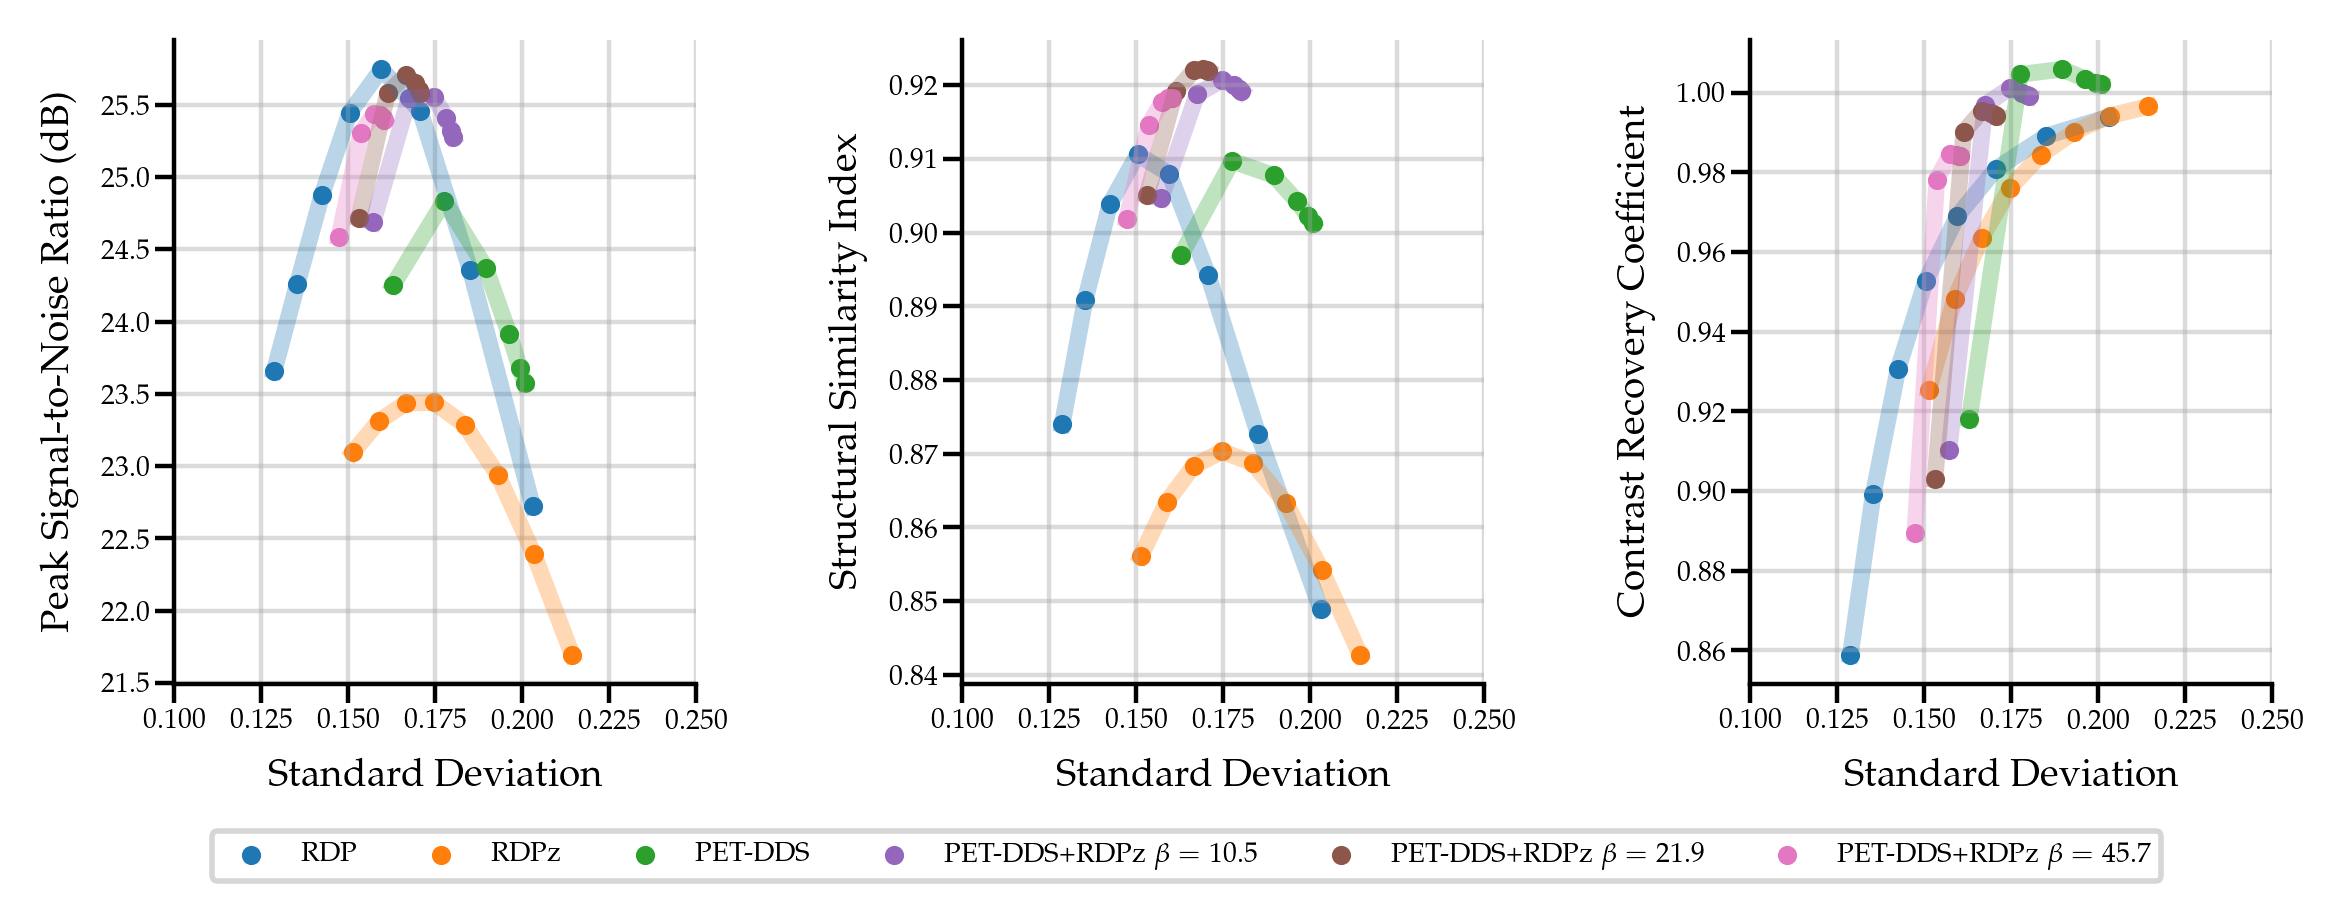

In [3]:
import matplotlib, os
import numpy as np
import matplotlib.pyplot as plt
from result_util_3D import get_sweep_mean_results
import matplotlib.patches as mpatches

text_width = (72.27 ** -1) * 487.8225 # in  --> Confirmed with template explanation
print('text_width', text_width)
column_width = (72.27 ** -1) * 234.8775
print('column_width', column_width)

fs_m1 = 5  # for figure ticks
fs = 7  # for regular figure text
fs_p1 = 8  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font', **{'family':'serif', 'serif': ['Palatino']})
matplotlib.rc('text', usetex=True)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(text_width, text_width/3), dpi = 400)

f_to_name = {
    "rdp": r"RDP ",
    "rdpz": r"RDPz",
    "dds_0.0": r"PET-DDS",
    "dds_5.0": r"PET-DDS+RDPz $\beta = 5.0$",
    "dds_10.5": r"PET-DDS+RDPz $\beta = 10.5$",
    "dds_21.9": r"PET-DDS+RDPz $\beta = 21.9$",
    "dds_45.7": r"PET-DDS+RDPz $\beta = 45.7$",
    "dds_95.6": r"PET-DDS+RDPz $\beta = 95.6$",
    "dds_200.0": r"PET-DDS+RDPz $\beta = 200.0$",
    "DIP_0.1": r"DIP+RDP",
    "DIP_0.0": r"DIP "
}

f_to_color = { 
    "rdp": '#1f77b4',
    "rdpz": '#ff7f0e',
    "dds_0.0": '#2ca02c', 
    #"dds_5.0": '#d62728',
    "dds_10.5": '#9467bd',
    "dds_21.9": '#8c564b',
    "dds_45.7": '#e377c2',
    #"dds_95.6": '#7f7f7f',
    #"dds_200.0": '#bcbd22',
    #"DIP_0.1": '#e377c2',
    #"DIP_0.0": '#7f7f7f',
}
c_idx = 0
dip_start = 100
dip_end = -50
dip_incre = 1
for r in f_to_color.keys():
    res = get_sweep_mean_results(f"3D_dicts/brainweb3D_low_FDG/{r}.pt")
    if "DIP" in r:
        ax1.plot(res["std"][dip_end:], res["psnr"][dip_end:], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax1.scatter(res["std"][dip_end:], res["psnr"][dip_end:], label=f_to_name[r], c=f_to_color[r],s=6)

        ax2.plot(res["std"][dip_end:], res["ssim"][dip_end:], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax2.scatter(res["std"][dip_end:], res["ssim"][dip_end:], label=f_to_name[r], c=f_to_color[r],s=6)

        crc_means = []
        for crc_vals in res["crc"][dip_end:]:
            crc_means.append(sum(crc_vals)/len(crc_vals))
        ax3.plot(res["std"][dip_end:], crc_means, ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax3.scatter(res["std"][dip_end:], crc_means, label=f_to_name[r], c=f_to_color[r],s=6)
        print(f_to_name[r])
        idx = res["psnr"][dip_end:].index(max(res["psnr"][dip_end:]))
        print(max(res["psnr"][dip_end:]), res["datafit_strengths"][dip_end:][idx])
        idx = res["ssim"][dip_end:].index(max(res["ssim"][dip_end:]))
        print(max(res["ssim"][dip_end:]), res["datafit_strengths"][dip_end:][idx])
        idx = crc_means.index(max(crc_means))
        print(max(crc_means), res["datafit_strengths"][dip_end:][idx])
    else:
        ax1.plot(res["std"], res["psnr"], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax1.scatter(res["std"], res["psnr"], label=f_to_name[r], c=f_to_color[r],s=6)

        ax2.plot(res["std"], res["ssim"], ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax2.scatter(res["std"], res["ssim"], label=f_to_name[r], c=f_to_color[r],s=6)
        """ if "dds_0.0" in r or "dds_21.9" in r or "rdp" in r:
           print(res["datafit_strengths"])
           for i in range(len(res["datafit_strengths"])):
               ax2.text(res["std"][i], res["ssim"][i], str(res["datafit_strengths"][i])) """


        crc_means = []
        for crc_vals in res["crc"]:
            crc_means.append(sum(crc_vals)/len(crc_vals))
        ax3.plot(res["std"], crc_means, ls="-", alpha=0.3, c=f_to_color[r], lw=3)
        ax3.scatter(res["std"], crc_means, label=f_to_name[r], c=f_to_color[r],s=6)
        print(f_to_name[r])
        idx = res["psnr"].index(max(res["psnr"]))
        print(max(res["psnr"]), res["datafit_strengths"][idx])
        idx = res["ssim"].index(max(res["ssim"]))
        print(max(res["ssim"]), res["datafit_strengths"][idx])
        idx = crc_means.index(max(crc_means))
        print(max(crc_means), res["datafit_strengths"][idx])

        
ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top']].set_visible(False)
ax1.tick_params(axis='both', which='major', pad = 1)
ax2.tick_params(axis='both', which='major', pad = 1)
ax3.tick_params(axis='both', which='major', pad = 1)
ax1.set_ylabel(r"Peak Signal-to-Noise Ratio (dB)")
ax1.set_xlabel(r"Standard Deviation")
ax2.set_ylabel(r"Structural Similarity Index")
ax2.set_xlabel(r"Standard Deviation")
ax3.set_ylabel(r"Contrast Recovery Coefficient")
ax3.set_xlabel(r"Standard Deviation")

ax1.set_xlim(0.1, 0.25)
ax2.set_xlim(0.1, 0.25)
ax3.set_xlim(0.1, 0.25)

ax1.grid(0.3, alpha=0.45, zorder=0)
ax2.grid(0.3, alpha=0.45, zorder=0)
ax3.grid(0.3, alpha=0.45, zorder=0)

lines_labels =  [ax1.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, ncols=6, loc="lower center", bbox_to_anchor=(0.5, -0.07))

plt.subplots_adjust(left=0.125,
        bottom=0.164,
        right=0.902,
        top=0.88,
        wspace=0.51,
        hspace=0.212)
plt.savefig("fdg_rdpz_sweep.pdf", dpi=400, bbox_inches = 'tight')